In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('./data/naics5811.csv')
df.dropna(inplace=True)

In [3]:
df['Category'] = df['naics'].astype(str).str[:3]
df['Average Yearly Wage'] = df['prodw']*1000/df['prode']
df.loc[df['Category'] == "311", 'Category'] = "Food Manufacturing"
df.loc[df['Category'] == "312", 'Category'] = "Beverage and Tobacco Product Manufacturing"
df.loc[df['Category'] == "313", 'Category'] = "Textile Mills"
df.loc[df['Category'] == "314", 'Category'] = "Textile Product Mills"
df.loc[df['Category'] == "315", 'Category'] = "Apparel Manufacturing"
df.loc[df['Category'] == "316", 'Category'] = "Leather and Allied Product Manufacturing"
df.loc[df['Category'] == "321", 'Category'] = "Wood Product Manufacturing"
df.loc[df['Category'] == "322", 'Category'] = "Paper Manufacturing"
df.loc[df['Category'] == "323", 'Category'] = "Printing and Related Support Activities"
df.loc[df['Category'] == "324", 'Category'] = "Petroleum and Coal Products Manufacturing"
df.loc[df['Category'] == "325", 'Category'] = "Chemical Manufacturing"
df.loc[df['Category'] == "326", 'Category'] = "Plastics and Rubber Products Manufacturing"
df.loc[df['Category'] == "327", 'Category'] = "Nonmetallic Mineral Product Manufacturing"
df.loc[df['Category'] == "331", 'Category'] = "Primary Metal Manufacturing"
df.loc[df['Category'] == "332", 'Category'] = "Fabricated Metal Product Manufacturing"
df.loc[df['Category'] == "333", 'Category'] = "Machinery Manufacturing"
df.loc[df['Category'] == "334", 'Category'] = "Computer and Electronic Product Manufacturing"
df.loc[df['Category'] == "335", 'Category'] = "Electrical Equipment, Appliance, and Component Manufacturing"
df.loc[df['Category'] == "336", 'Category'] = "Transportation Equipment Manufacturing"
df.loc[df['Category'] == "337", 'Category'] = "Furniture and Related Product Manufacturing"
df.loc[df['Category'] == "339", 'Category'] = "Miscellaneous Manufacturing"
df['Real Matcost'] = df['matcost']/df['pimat']
df['Real Vship'] = df['vship']/df['piship']
df['Real Invest'] = df['invest']/df['piinv']
df['Real Energy'] = df['energy']/df['pien']
df['Real TFP5'] = df['dtfp5']/df['tfp5']

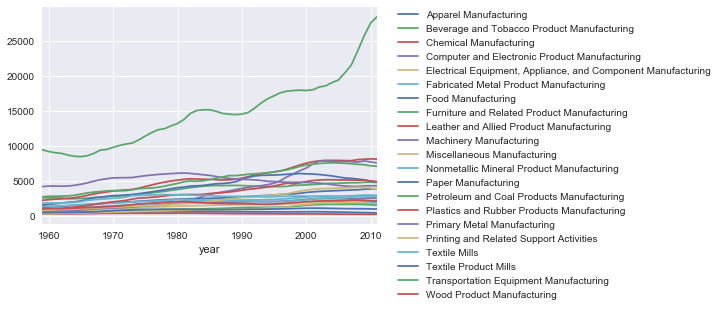

In [4]:
table = pd.pivot_table(df, values='cap', index='year', columns='Category')
#table
fig, ax = plt.subplots()
table.plot(ax=ax)
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('Catagory Cap', bbox_inches='tight')
#df.corr()

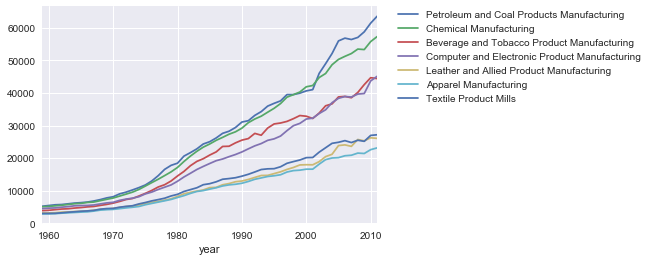

In [5]:
table = pd.pivot_table(df, values='Average Yearly Wage', index='year', columns='Category')
fig, ax = plt.subplots()
table[["Petroleum and Coal Products Manufacturing", 'Chemical Manufacturing', 'Beverage and Tobacco Product Manufacturing', "Computer and Electronic Product Manufacturing", "Leather and Allied Product Manufacturing", "Apparel Manufacturing", "Textile Product Mills"]].plot(ax=ax)
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('Annual Wage', bbox_inches='tight')
#table
#df.corr()

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,invest,invent,energy,cap,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,pctnmfg,Average Yearly Wage,Real Matcost,Real Vship,Real Invest,Real Energy,Real TFP5
naics,1.000000,0.000301,0.054422,0.129683,0.016025,0.022357,0.095313,0.004086,-0.010960,0.037397,0.025292,0.075830,-0.034381,0.011735,0.013396,0.007942,0.045524,0.004766,0.057760,-0.024159,0.019684,-0.026322,0.019937,-0.026436,-0.019091,0.093026,-0.012801,0.020327,0.015785,-0.033549,0.015550
year,0.000301,1.000000,-0.063808,0.304590,-0.085244,-0.081093,0.287710,0.227210,0.163765,0.307710,0.200417,0.218332,0.171845,0.132991,0.173575,0.051510,0.159136,0.871088,0.926071,0.948819,-0.033839,0.156709,-0.033717,0.156152,-0.039414,0.859164,0.106092,0.115543,0.113251,0.045746,-0.022796
emp,0.054422,-0.063808,1.000000,0.740774,0.970890,0.969931,0.754082,0.345335,0.239151,0.491650,0.402631,0.426423,0.252783,0.528305,0.491640,0.554230,0.017273,-0.032402,-0.036241,-0.069949,0.013383,-0.011011,0.013505,-0.010731,0.020764,-0.034034,0.393102,0.366108,0.507528,0.403525,0.016907
pay,0.129683,0.304590,0.740774,1.000000,0.657253,0.666530,0.941169,0.594018,0.422772,0.820125,0.649612,0.696363,0.419382,0.642149,0.657825,0.567225,0.071925,0.276759,0.305868,0.285738,0.009343,0.083176,0.009522,0.083190,-0.013168,0.387811,0.502103,0.502314,0.636261,0.394608,0.005615
prode,0.016025,-0.085244,0.970890,0.657253,1.000000,0.997661,0.732080,0.307200,0.221780,0.416566,0.353547,0.338564,0.246458,0.502885,0.466814,0.529629,-0.008373,-0.065721,-0.070571,-0.090064,0.009030,-0.026518,0.009078,-0.026105,0.029289,-0.073845,0.375332,0.326100,0.468325,0.409988,0.009600
prodh,0.022357,-0.081093,0.969931,0.666530,0.997661,1.000000,0.744020,0.318985,0.233175,0.426038,0.365468,0.344466,0.258843,0.514469,0.478851,0.539561,-0.008845,-0.063235,-0.067884,-0.086781,0.010465,-0.023239,0.010523,-0.022845,0.029990,-0.061760,0.388778,0.334492,0.480329,0.419730,0.009475
prodw,0.095313,0.287710,0.754082,0.941169,0.732080,0.744020,1.000000,0.583643,0.443516,0.741630,0.615785,0.600128,0.467540,0.660563,0.678871,0.579634,0.053213,0.258137,0.285389,0.275767,-0.000700,0.063764,-0.000579,0.063869,-0.007372,0.364683,0.533077,0.470893,0.618766,0.456569,-0.001307
vship,0.004086,0.227210,0.345335,0.594018,0.307200,0.318985,0.583643,1.000000,0.965591,0.810473,0.817149,0.717330,0.735277,0.724028,0.734029,0.653108,0.057541,0.235512,0.208555,0.234646,0.005182,0.081226,0.005237,0.081348,-0.011471,0.372994,0.876746,0.600178,0.760734,0.554337,-0.000270
matcost,-0.010960,0.163765,0.239151,0.422772,0.221780,0.233175,0.443516,0.965591,1.000000,0.630534,0.728263,0.623918,0.727714,0.642195,0.647068,0.586353,0.044135,0.184817,0.149438,0.177392,-0.005445,0.041748,-0.005372,0.041881,-0.008643,0.296703,0.882121,0.516419,0.676074,0.540166,-0.002547
vadd,0.037397,0.307710,0.491650,0.820125,0.416566,0.426038,0.741630,0.810473,0.630534,1.000000,0.797929,0.742191,0.554773,0.712657,0.731487,0.626975,0.072290,0.285695,0.284491,0.299045,0.027920,0.147888,0.027922,0.147948,-0.014744,0.443709,0.629685,0.626801,0.747000,0.437074,0.004789


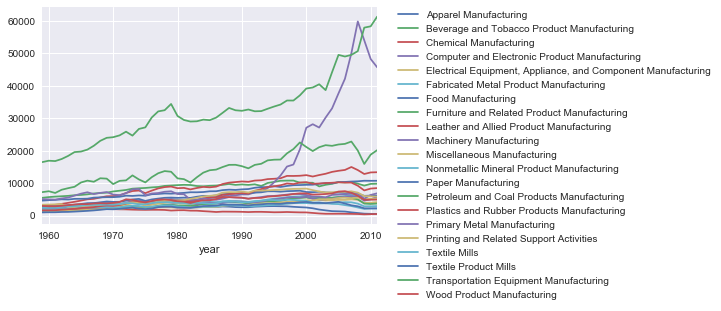

In [6]:
table = pd.pivot_table(df, values='Real Vship', index='year', columns='Category')
fig, ax = plt.subplots()
table.plot(ax=ax)
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('Cat - Real VShip', bbox_inches='tight')
#table
df.corr()

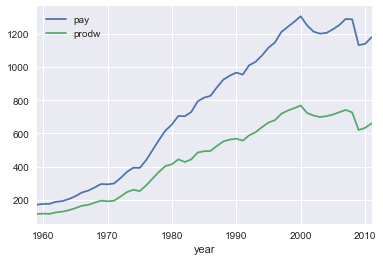

In [7]:
df.groupby('year')[['emp', 'prode']].sum()
plt.savefig('Employment')
df.groupby('year')[['pay', 'prodw']].mean().plot()
plt.savefig('Pay')

In [8]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
X = df.drop(['naics','Category','Average Yearly Wage', 'piship', 'pimat', 'piinv', 'pien', 'dtfp5', 'dtfp4', 'Real TFP5', 'tfp5', 'tfp4', 'pctnmfg'], axis=1)
y = df[['Average Yearly Wage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
coef = pd.DataFrame(data=pipe.steps[1][1].coef_, columns=X.columns.values)
coef.sort_values(0, axis=1)

0.81348744926
0.81238520075


,equip,plant,prode,matcost,invest,vadd,Real Energy,pay,Real Vship,invent,Real Matcost,emp,prodw,energy,Real Invest,year,prodh,vship,cap
0,-78062.680102,-45279.204158,-15266.809277,-10672.430569,-4200.300558,-2037.589016,-1610.4885,-741.251315,-300.287289,507.286493,1274.488857,1606.352671,1933.973109,2597.638586,3747.89553,10169.466989,10865.227369,11835.702506,121569.318351


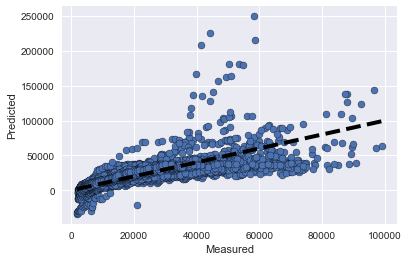

In [9]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(pipe, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

(array([  9.39200000e+03,   5.64900000e+03,   4.90500000e+03,
          3.16400000e+03,   1.22400000e+03,   3.74000000e+02,
          1.47000000e+02,   3.50000000e+01,   1.50000000e+01,
          8.00000000e+00]),
 array([-1.3034994 , -0.58035353,  0.14279235,  0.86593822,  1.5890841 ,
         2.31222997,  3.03537585,  3.75852173,  4.4816676 ,  5.20481348,
         5.92795935]),
 <a list of 10 Patch objects>)

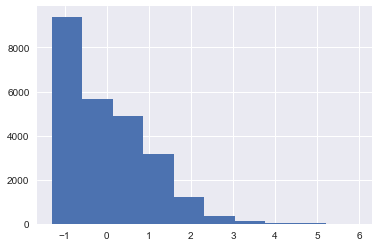

In [10]:
scale = StandardScaler()
y_scaled = scale.fit_transform(y)
plt.hist(y_scaled)